In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import xgboost as xgb
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv("/content/cdc_train.csv")


In [12]:
test_df= pd.read_csv('/content/cdc_ds_test.csv')

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')


In [14]:
df['log_price'] = df['price'].apply(lambda x: np.log(x))

In [15]:
numeric_cols= ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [16]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])


In [17]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'log_price'],
      dtype='object')

In [18]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd
import os
from tqdm import tqdm

In [19]:
features_resnet= pd.read_csv("/content/drive/MyDrive/House_Price_Project_Final/features/resnet_features_512.csv")

In [20]:
features_resnet.head()

,img_feat_0,img_feat_1,img_feat_2,img_feat_3,img_feat_4,img_feat_5,img_feat_6,img_feat_7,img_feat_8,img_feat_9,...,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511,id
0,0.018600,0.144798,1.311415,0.098110,0.403078,0.616295,0.909187,1.496928,1.968919,1.119215,...,0.157892,0.532916,0.560708,0.000000,0.210917,0.703232,1.010655,0.664332,0.000000,9117000170
1,0.472351,0.135211,3.182259,0.246961,0.072650,0.065367,0.625350,0.898638,1.593249,2.361855,...,0.319023,0.390403,1.706257,0.000000,1.016085,1.792019,2.009611,0.178773,0.393116,6700390210
2,0.420289,0.310904,1.326100,0.389269,0.651462,0.449130,0.279591,1.420183,2.154287,1.269130,...,1.525771,0.520503,2.366577,0.114988,2.148061,0.528476,1.505133,0.181216,0.133635,7212660540
3,0.042957,0.426265,1.759102,0.172925,0.227874,0.401043,1.491914,0.761423,1.569707,1.308950,...,0.958589,0.638155,1.243960,0.085733,2.253529,0.013246,1.573162,0.881865,0.056145,8562780200
4,0.144827,0.198062,0.813048,0.010523,0.046097,0.662091,0.856346,1.604122,1.597418,1.217113,...,0.627851,0.008110,1.552384,0.115803,1.206524,0.439638,1.190209,0.331199,0.000330,7760400350


In [21]:
df_res_train= df.merge(features_resnet, on='id')

In [22]:
df_res_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,img_feat_502,img_feat_503,img_feat_504,img_feat_505,img_feat_506,img_feat_507,img_feat_508,img_feat_509,img_feat_510,img_feat_511
0,9117000170,2015-05-05,268643,0.677402,0.178963,-0.290276,-0.144952,0.922943,-0.083788,-0.306964,...,0.703124,0.157892,0.532916,0.560708,0.000000,0.210917,0.703232,1.010655,0.664332,0.000000
1,6700390210,2014-07-08,245000,-0.394132,0.505667,-0.521813,-0.311135,0.922943,-0.083788,-0.306964,...,1.275297,0.319023,0.390403,1.706257,0.000000,1.016085,1.792019,2.009611,0.178773,0.393116
2,7212660540,2015-01-15,200000,0.677402,0.505667,-0.389506,-0.160457,0.922943,-0.083788,-0.306964,...,0.367382,1.525771,0.520503,2.366577,0.114988,2.148061,0.528476,1.505133,0.181216,0.133635
3,8562780200,2015-04-27,352499,-1.465666,0.178963,-0.918734,-0.364787,0.922943,-0.083788,-0.306964,...,0.794746,0.958589,0.638155,1.243960,0.085733,2.253529,0.013246,1.573162,0.881865,0.056145
4,7760400350,2014-12-05,232000,-0.394132,-0.147741,-0.874632,-0.038936,-0.918626,-0.083788,-0.306964,...,0.098142,0.627851,0.008110,1.552384,0.115803,1.206524,0.439638,1.190209,0.331199,0.000330


In [23]:
x_res = df_res_train.drop(['id', 'date', 'price', 'log_price'], axis=1)
y_res = df_res_train['log_price']

In [24]:
x_train_res , x_val_res, y_train_res, y_val_res = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


In [25]:
print(x_train_res.shape)
print(x_val_res.shape)
print(y_train_res.shape)
print(y_val_res.shape)

(13125, 530)
(3282, 530)
(13125,)
(3282,)


In [26]:
# 1. Redefine the model with early stopping inside
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    early_stopping_rounds=50, # Move it here
    n_jobs=-1,
    random_state=42
)

# 2. Fit without the early_stopping_rounds argument
model.fit(
    x_train_res, y_train_res,
    eval_set=[(x_val_res, y_val_res)],
    verbose=False
)

# 3. Evaluate
preds = model.predict(x_val_res)
print(f"R2: {r2_score(y_val_res, preds):.4f}")
print(f"MSE: {mean_squared_error(y_val_res, preds):.4f}")





R2: 0.8904
MSE: 0.0313


In [33]:
test_features_resnet= pd.read_csv("/content/drive/MyDrive/House_Price_Project_Final/features/test_image_features.csv")

In [34]:
test_features_resnet.shape

(5404, 513)

In [35]:
test_df.shape

(5404, 20)

In [36]:
missing_ids = set(test_df['id']) - set(test_features_resnet['id'])

if not missing_ids:
    print("All IDs are present.")
else:
    print(f"Missing {len(missing_ids)} IDs.")
    print(f"Samples of missing IDs: {list(missing_ids)[:5]}")

All IDs are present.


In [37]:
# 1. Remove duplicates from the features dataframe
# This ensures each ID appears only once
features_unique = test_features_resnet.drop_duplicates(subset=['id'])

# 2. Perform the left merge
final_test_df = test_df.merge(features_unique, on='id', how='left')

# 3. Verify the shape - should now be (5404, 532)
print(f"New shape: {final_test_df.shape}")

New shape: (5404, 532)


In [41]:
# Extract only the features (dropping the 'id' column)
# Ensure you only use the columns the model was trained on
test_features = final_test_df.drop(columns=['id'])

# Optional: Ensure column order matches the training set exactly
test_features = test_features[x_train_res.columns]

In [53]:
# Predict using the model
test_preds = model.predict(test_features)

# Add predictions back to the dataframe for easy viewing
final_test_df['predictions'] = test_preds
print(final_test_df[['id', 'predictions']].head())

           id  predictions
0  2591820310    12.865029
1  7974200820    13.689857
2  7701450110    13.931082
3  9522300010    14.436393
4  9510861140    13.472511


In [52]:

final_test_df['price_prediction'] = np.exp(final_test_df['predictions'])
print(final_test_df[['id', 'price_prediction']].head())

           id  price_prediction
0  2591820310      3.865549e+05
1  7974200820      8.819208e+05
2  7701450110      1.122514e+06
3  9522300010      1.860569e+06
4  9510861140      7.096388e+05


In [51]:
# Convert scientific notation to standard integers
final_test_df['price_prediction'] = final_test_df['price_prediction'].round(0).astype(int)

In [50]:
print("Prediction Summary:")
print(final_test_df['price_prediction'].describe())

print(f"Any negative prices? {(final_test_df['price_prediction'] < 0).any()}")

Prediction Summary:
count    5.404000e+03
mean     5.337736e+05
std      3.334766e+05
min      1.320980e+05
25%      3.217200e+05
50%      4.520440e+05
75%      6.330812e+05
max      3.765897e+06
Name: price_prediction, dtype: float64
Any negative prices? False


**It is always wise to visualize the distribution. Our training data was right-skewed (many affordable houses and a few very expensive ones), so our predictions should also show the same pattern.**

<Axes: xlabel='price_prediction', ylabel='Count'>

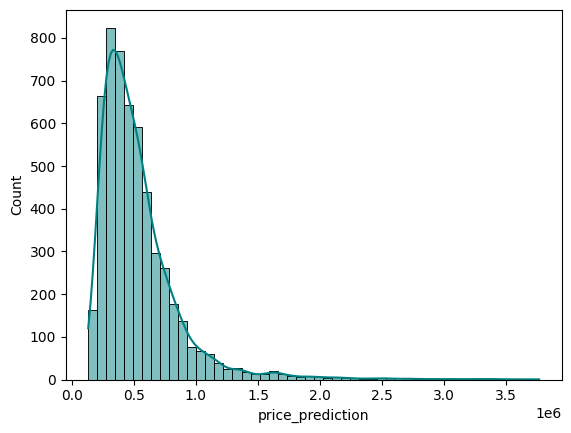

In [49]:
sns.histplot(final_test_df['price_prediction'], bins=50, kde=True, color='teal')

Right skewed.

In [54]:
# Create the final submission-ready dataframe
submission = final_test_df[['id', 'price_prediction']].copy()
submission['price_prediction'] = submission['price_prediction'].astype(int)

# Save to CSV
submission.to_csv('final_predictions.csv', index=False)
print("File 'final_predictions.csv' is ready!")

File 'final_predictions.csv' is ready!


In [55]:
from google.colab import files
files.download('final_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>